<a href="https://colab.research.google.com/github/Kevin-Rush/FashionMNIST_Experiment/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam #needs tensorflow.keras to import Adam
from keras.callbacks import TensorBoard

In [65]:
train_df = pd.read_csv(r'fashion-mnist_train.csv')
test_df = pd.read_csv(r'fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [66]:
train_data = np.array(train_df, dtype="float32")
test_data = np.array(test_df, dtype="float32")

x_train = train_data[:, 1:] / 255   #Dividing all of the training data into X and Y data, also normalizing the X data to be pixel data
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255     #Dividing all of the testing data into X and Y data, also normalizing the X data to be pixel data
y_test = test_data[:, 0]


In [67]:
#splitting up training data into training and validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345, #20 percent for validation data
)

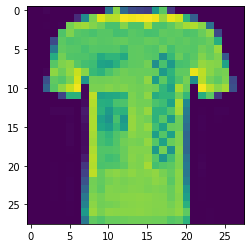

In [68]:
image = x_train[150, :].reshape((28,28))

plt.imshow(image)
plt.show()

In [69]:
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows, image_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *image_shape) #reshaping x_train to be the size of the first row in x_train then make the images 28x28x1
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_val = x_val.reshape(x_val.shape[0], *image_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_val shape: {}'.format(x_val.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_val shape: (12000, 28, 28, 1)


In [70]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=image_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation = "relu"),
    Dense(10, activation = "softmax")
])

In [71]:
tensorboard = TensorBoard(
    log_dir=r"logs\{}".format("cnn_layer"),
    write_graph=True,
    write_grads=True,
    histogram_freq=1,
    write_images=True,
)

cnn_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

In [72]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[tensorboard]
)

Epoch 1/10
94/94 [==============================] - 21s 218ms/step - loss: 0.7810 - accuracy: 0.7279 - val_loss: 0.4826 - val_accuracy: 0.8266
Epoch 2/10
94/94 [==============================] - 21s 218ms/step - loss: 0.4424 - accuracy: 0.8450 - val_loss: 0.4064 - val_accuracy: 0.8561
Epoch 3/10
94/94 [==============================] - 20s 216ms/step - loss: 0.3879 - accuracy: 0.8637 - val_loss: 0.3604 - val_accuracy: 0.8769
Epoch 4/10
94/94 [==============================] - 20s 215ms/step - loss: 0.3532 - accuracy: 0.8772 - val_loss: 0.3395 - val_accuracy: 0.8798
Epoch 5/10
94/94 [==============================] - 20s 216ms/step - loss: 0.3310 - accuracy: 0.8848 - val_loss: 0.3258 - val_accuracy: 0.8849
Epoch 6/10
94/94 [==============================] - 20s 216ms/step - loss: 0.3150 - accuracy: 0.8889 - val_loss: 0.3076 - val_accuracy: 0.8943
Epoch 7/10
94/94 [==============================] - 20s 216ms/step - loss: 0.3024 - accuracy: 0.8930 - val_loss: 0.2943 - val_accuracy: 0.8972

In [73]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print("test loss: {:.4f}".format(score[0]))
print("test accuracy: {:.4f}".format(score[1]))


test loss: 0.2729
test accuracy: 0.9069
